In [2]:
from prophet import Prophet
import pandas as pd
from matplotlib import pyplot as plt

c:\Users\User\Documents\Year 4\MLFinalAssignment\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [36]:
data = pd.read_csv('./UsageByDayClean.csv',usecols=['TIME','BIKE USAGE'])
data['TIME'] = pd.to_datetime(data['TIME'])
data.rename(columns={'TIME':'ds','BIKE USAGE':'y'},inplace=True)

pre_covid_date = pd.to_datetime('2020-02-01')
# remove all data after 2020-03-27
data_pre_covid = data[data['ds'] < pre_covid_date]
data_in_covid = data[data['ds'] >= pre_covid_date]

In [18]:
data.tail()

,ds,y
1196,2021-12-27,516.0
1197,2021-12-28,499.0
1198,2021-12-29,592.0
1199,2021-12-30,418.0
1200,2021-12-31,594.0


19:40:32 - cmdstanpy - INFO - Chain [1] start processing
19:40:32 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\User\Documents\Year 4\MLFinalAssignment\venv\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\User\Documents\Year 4\MLFinalAssignment\venv\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


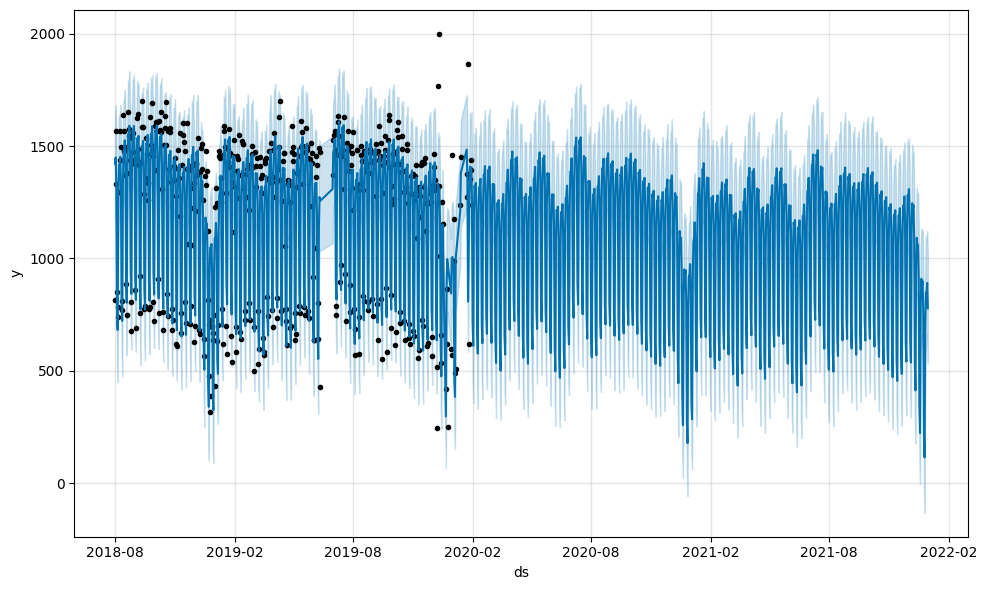

In [50]:
model = Prophet(yearly_seasonality=True,weekly_seasonality=True,daily_seasonality=False)
model.fit(data_pre_covid)
future = model.make_future_dataframe(periods=700)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

In [51]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1202,2021-12-27,1005.770591,455.602691,946.931146,1005.766356,1005.775124,-306.050490,-306.050490,-306.050490,83.497112,83.497112,83.497112,-389.547602,-389.547602,-389.547602,0.0,0.0,0.0,699.720101
1203,2021-12-28,1005.593415,608.909712,1099.167685,1005.589170,1005.597954,-157.070081,-157.070081,-157.070081,229.438092,229.438092,229.438092,-386.508173,-386.508173,-386.508173,0.0,0.0,0.0,848.523334
1204,2021-12-29,1005.416239,603.974128,1084.247889,1005.411983,1005.420784,-162.995758,-162.995758,-162.995758,216.381389,216.381389,216.381389,-379.377147,-379.377147,-379.377147,0.0,0.0,0.0,842.420481
1205,2021-12-30,1005.239062,662.588048,1122.557416,1005.234796,1005.243614,-114.178891,-114.178891,-114.178891,254.066103,254.066103,254.066103,-368.244994,-368.244994,-368.244994,0.0,0.0,0.0,891.060172
1206,2021-12-31,1005.061886,532.389863,1016.026857,1005.057609,1005.066445,-227.127273,-227.127273,-227.127273,126.153779,126.153779,126.153779,-353.281052,-353.281052,-353.281052,0.0,0.0,0.0,777.934614


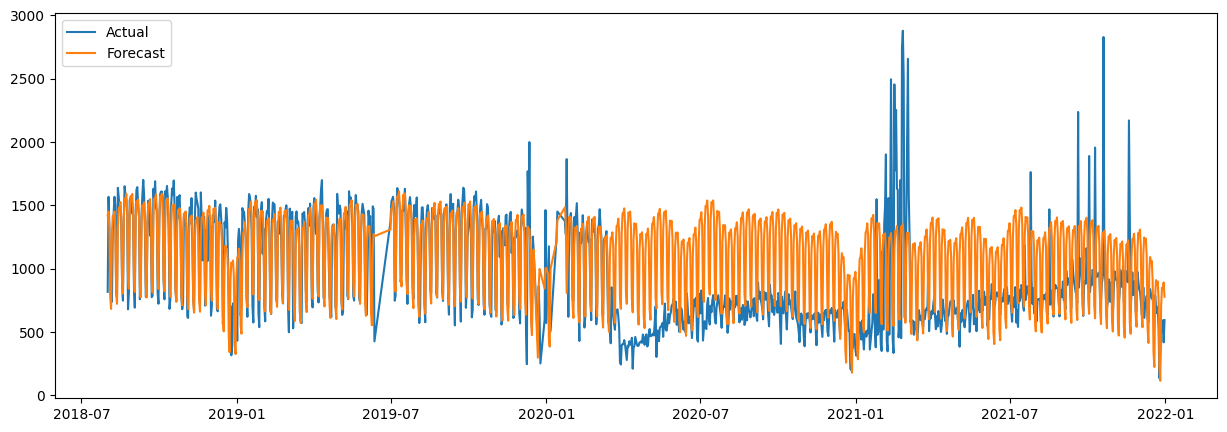

In [52]:
# create a pyplot figure with 2 features. 
plt.figure(figsize=(15,5))
plt.plot(data['ds'],data['y'],label='Actual')
plt.plot(forecast['ds'],forecast['yhat'],label='Forecast')
plt.legend()
plt.show()

In [45]:
total_median = data['y'].median()
pre_covid_median= data_pre_covid['y'].median()
during_covid_median= data_in_covid['y'].median()
total_forecast_median= forecast['yhat'].median()
forecast_in_covid_median = forecast[forecast['ds'] >= pre_covid_date]['yhat'].median()
print('total_median: ',total_median)
print('pre_covid_median: ',pre_covid_median)
print('during_covid_median: ',during_covid_median)
print('forecast_median: ',total_forecast_median.__round__(2))
print('forecast_in_covid_median: ',forecast_in_covid_median.__round__(2))

total_median:  766.0
pre_covid_median:  1348.0
during_covid_median:  678.0
forecast_median:  1250.44
forecast_in_covid_median:  1211.97
